## Causal Inference

Computing the prompt engineering effect on ChatGPT Levenshtein performance

In [36]:
from Levenshtein import distance as lev
import pandas as pd


In [37]:
import json
json_path = '/workspaces/chat-gpt-failures/datasets/galeras_prompting/random_cut.json'
with open(json_path) as json_file:
    json_data = json.load(json_file)

In [40]:
lev_calc = [lev(x["code"].strip(), x["predicted_control"] ) for x in json_data]
for i,data in enumerate(json_data):
    data["y_levenshtein"] = lev_calc[i]
    data["t_binary_treatment"] = False

In [53]:
len(json_data)

2787

In [41]:
json_path = '/workspaces/chat-gpt-failures/datasets/galeras_prompting/random_cut_P2.json'
with open(json_path) as json_file:
    json_data_T1 = json.load(json_file)

In [42]:
lev_calc_T1 = [lev(x["code"].strip(), x["predicted_P2"] ) for x in json_data_T1]
for i,data in enumerate(json_data_T1):
    data["y_levenshtein"] = lev_calc_T1[i]
    data["t_binary_treatment"] = True

In [43]:
json_str = json.dumps(json_data)

In [44]:
df = pd.read_json(json_str)


In [45]:
df.head()

,repo,path,file_name,fun_name,commit_message,code,random_split,signature,tested_class,docstring,...,n_ast_errors,ast_levels,n_whitespaces_,complexity,nloc,token_counts,n_ast_nodes,predicted_control,y_levenshtein,t_binary_treatment
0,paasta,paasta_tools/contrib/service_shard_remove.py,service_shard_remove.py,get_default_git_remote,adds service_shard_remove script,def get_default_git_remote():\n system_paas...,def get_default_git_remote():\n system_paas...,def get_default_git_remote(),,None,...,0,11,46,1,9,47,185,I have completed the code as requested:\n\n```...,527,False
1,paasta,paasta_tools/contrib/service_shard_remove.py,service_shard_remove.py,main,adds service_shard_remove script,def main(args):\n updater = AutoConfigUpdat...,def main(args):\n updater = AutoConfigUpdat...,def main(args),,None,...,0,15,141,7,38,233,493,targeted_step']\n\n # Remove shard from...,1826,False
2,paasta,paasta_tools/contrib/service_shard_remove.py,service_shard_remove.py,parse_args,adds service_shard_remove script,def parse_args():\n parser = argparse.Argum...,def parse_args():\n parser = argparse.Argum...,def parse_args(),,None,...,0,10,95,1,45,182,308,"dest=""local_dir"",\n )\n \n args = par...",1228,False
3,paasta,tests/kubernetes/bin/test_paasta_secrets_sync.py,test_paasta_secrets_sync.py,test_sync_all_secrets,Mock load_system_paasta_config in a test,def test_sync_all_secrets(namespace):\n wit...,def test_sync_all_secrets(namespace):\n wit...,def test_sync_all_secrets(namespace),,None,...,1,13,61,1,37,178,314,"Code:\n\n```\nfrom typing import List, Dict\nf...",1544,False
4,paasta,paasta_tools/cli/cmds/validate.py,validate.py,get_config_file_dict,Add validation for users overriding CPU reques...,def get_config_file_dict(file_path) -> Dict[An...,def get_config_file_dict(file_path) -> Dict[An...,def get_config_file_dict(file_path) -> Dict[An...,,None,...,0,12,35,4,14,80,141,yaml.safe_load(config_file)\n elif exte...,337,False


In [49]:
json_str = json.dumps(json_data_T1)
df_T1 = pd.read_json(json_str)
df_total= pd.concat([df,df_T1], ignore_index = True)


In [51]:
df_total.head()

,repo,path,file_name,fun_name,commit_message,code,random_split,signature,tested_class,docstring,...,ast_levels,n_whitespaces_,complexity,nloc,token_counts,n_ast_nodes,predicted_control,y_levenshtein,t_binary_treatment,predicted_P2
0,paasta,paasta_tools/contrib/service_shard_remove.py,service_shard_remove.py,get_default_git_remote,adds service_shard_remove script,def get_default_git_remote():\n system_paas...,def get_default_git_remote():\n system_paas...,def get_default_git_remote(),,None,...,11,46,1,9,47,185,I have completed the code as requested:\n\n```...,527,False,NaN
1,paasta,paasta_tools/contrib/service_shard_remove.py,service_shard_remove.py,main,adds service_shard_remove script,def main(args):\n updater = AutoConfigUpdat...,def main(args):\n updater = AutoConfigUpdat...,def main(args),,None,...,15,141,7,38,233,493,targeted_step']\n\n # Remove shard from...,1826,False,NaN
2,paasta,paasta_tools/contrib/service_shard_remove.py,service_shard_remove.py,parse_args,adds service_shard_remove script,def parse_args():\n parser = argparse.Argum...,def parse_args():\n parser = argparse.Argum...,def parse_args(),,None,...,10,95,1,45,182,308,"dest=""local_dir"",\n )\n \n args = par...",1228,False,NaN
3,paasta,tests/kubernetes/bin/test_paasta_secrets_sync.py,test_paasta_secrets_sync.py,test_sync_all_secrets,Mock load_system_paasta_config in a test,def test_sync_all_secrets(namespace):\n wit...,def test_sync_all_secrets(namespace):\n wit...,def test_sync_all_secrets(namespace),,None,...,13,61,1,37,178,314,"Code:\n\n```\nfrom typing import List, Dict\nf...",1544,False,NaN
4,paasta,paasta_tools/cli/cmds/validate.py,validate.py,get_config_file_dict,Add validation for users overriding CPU reques...,def get_config_file_dict(file_path) -> Dict[An...,def get_config_file_dict(file_path) -> Dict[An...,def get_config_file_dict(file_path) -> Dict[An...,,None,...,12,35,4,14,80,141,yaml.safe_load(config_file)\n elif exte...,337,False,NaN


In [52]:
df_total.shape

(5574, 24)

In [58]:
df_prune = df_total.drop(columns=['repo', 'path','file_name','fun_name','commit_message','code','random_split','tested_class','docstring','predicted_control', 'predicted_P2', 'language', 'url','signature', 'ast_errors' ])

In [59]:
df_prune

,n_ast_errors,ast_levels,n_whitespaces_,complexity,nloc,token_counts,n_ast_nodes,y_levenshtein,t_binary_treatment
0,0,11,46,1,9,47,185,527,False
1,0,15,141,7,38,233,493,1826,False
2,0,10,95,1,45,182,308,1228,False
3,1,13,61,1,37,178,314,1544,False
4,0,12,35,4,14,80,141,337,False
...,...,...,...,...,...,...,...,...,...
5569,0,17,125,6,21,103,184,945,True
5570,0,10,22,1,12,45,83,342,True
5571,0,9,36,1,15,54,109,440,True
5572,0,9,32,1,7,72,122,263,True


In [60]:
df_prune = df_prune.rename(columns={'n_ast_errors':'z_n_ast_errors','ast_levels':'z_ast_levels','n_whitespaces_':'z_n_whitespaces','complexity':'z_complexity','nloc':'z_nloc','token_counts':'z_token_counts','n_ast_nodes':'z_n_ast_nodes'})

In [61]:
df_prune.head()

,z_n_ast_errors,z_ast_levels,z_n_whitespaces,z_complexity,z_nloc,z_token_counts,z_n_ast_nodes,y_levenshtein,t_binary_treatment
0,0,11,46,1,9,47,185,527,False
1,0,15,141,7,38,233,493,1826,False
2,0,10,95,1,45,182,308,1228,False
3,1,13,61,1,37,178,314,1544,False
4,0,12,35,4,14,80,141,337,False


In [90]:
frame = df_prune[['y_levenshtein','t_binary_treatment']].groupby('t_binary_treatment').describe()

In [91]:
frame.to_json('/workspaces/chat-gpt-failures/data/frame.json')

In [88]:
import seaborn as sns
sns.set_theme(style="darkgrid")

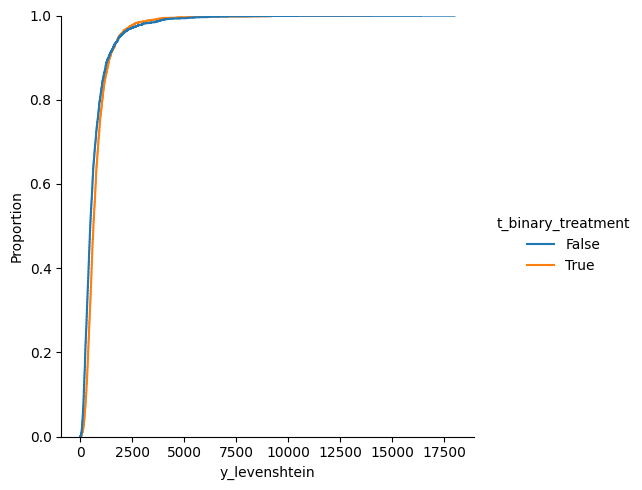

In [71]:
sns.displot(df_prune, x="y_levenshtein", hue="t_binary_treatment",kind="ecdf")

In [ ]:
sns.histplot(data=df_prune[["words0","words1"]], kde=True, log_scale=True).set_title("test")

<Axes: title={'center': 'y_levenshtein'}, xlabel='[t_binary_treatment]'>

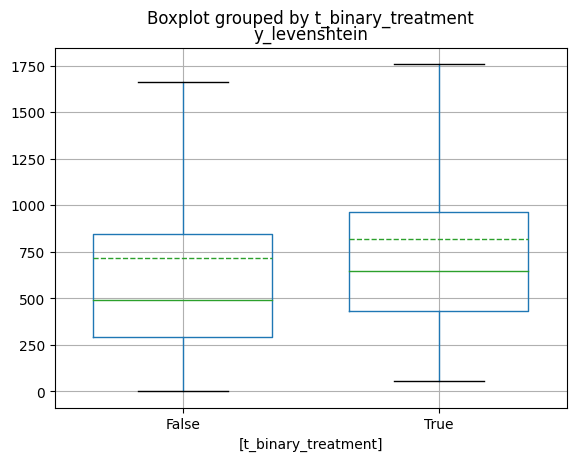

In [70]:
df_prune[['y_levenshtein','t_binary_treatment']].boxplot( by='t_binary_treatment',
    bootstrap=500, 
    showfliers=False,
    showmeans=True, 
    meanline = True,
    widths = 0.7
    )

In [73]:
from scipy import stats


In [81]:
confounders = {'n_ast_errors':'z_n_ast_errors','ast_levels':'z_ast_levels','n_whitespaces_':'z_n_whitespaces','complexity':'z_complexity','nloc':'z_nloc','token_counts':'z_token_counts','n_ast_nodes':'z_n_ast_nodes'}

In [85]:
list(confounders.values())

['z_n_ast_errors',
 'z_ast_levels',
 'z_n_whitespaces',
 'z_complexity',
 'z_nloc',
 'z_token_counts',
 'z_n_ast_nodes']

In [86]:
for z in list(confounders.values()):
    tmp= stats.pearsonr(df_prune.y_levenshtein.values,df_prune[z].values)
    print(z,tmp)
    

z_n_ast_errors PearsonRResult(statistic=0.022815634286326998, pvalue=0.08852367827642928)
z_ast_levels PearsonRResult(statistic=0.3491226155386271, pvalue=1.6495322442173506e-159)
z_n_whitespaces PearsonRResult(statistic=0.7848915001530669, pvalue=0.0)
z_complexity PearsonRResult(statistic=0.36319073361978055, pvalue=2.056571829793892e-173)
z_nloc PearsonRResult(statistic=0.6424837781077538, pvalue=0.0)
z_token_counts PearsonRResult(statistic=0.6113812059841558, pvalue=0.0)
z_n_ast_nodes PearsonRResult(statistic=0.7232907836782351, pvalue=0.0)


In [ ]:
df_prune["t_binary_treatment"] = 

<Axes: xlabel='z_nloc', ylabel='y_levenshtein'>

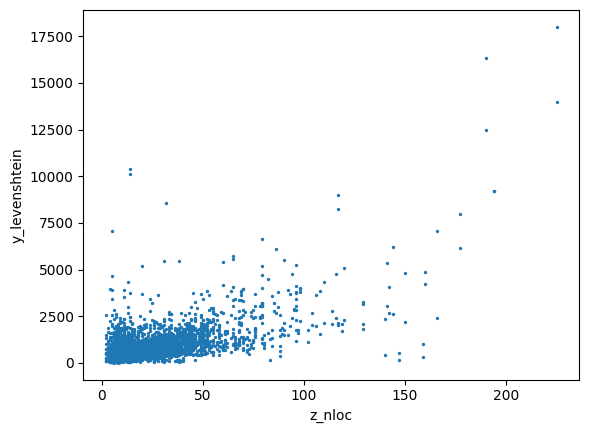

In [77]:
df_prune.plot.scatter(x="z_nloc", y="y_levenshtein", s=2)

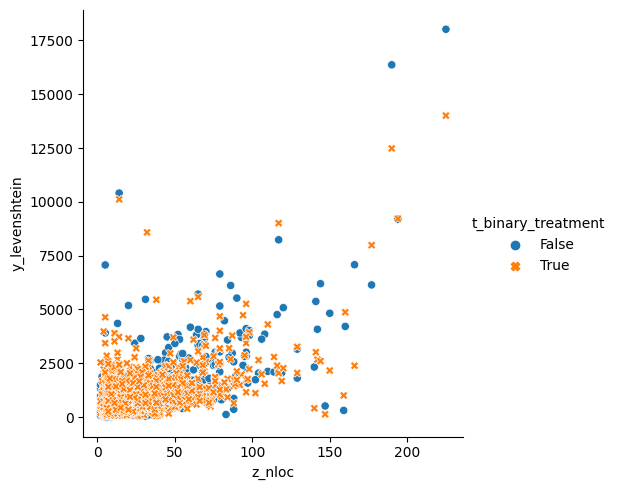

In [79]:
sns.relplot(
    data=df_prune,
    x="z_nloc", y="y_levenshtein", hue="t_binary_treatment", style="t_binary_treatment"
)

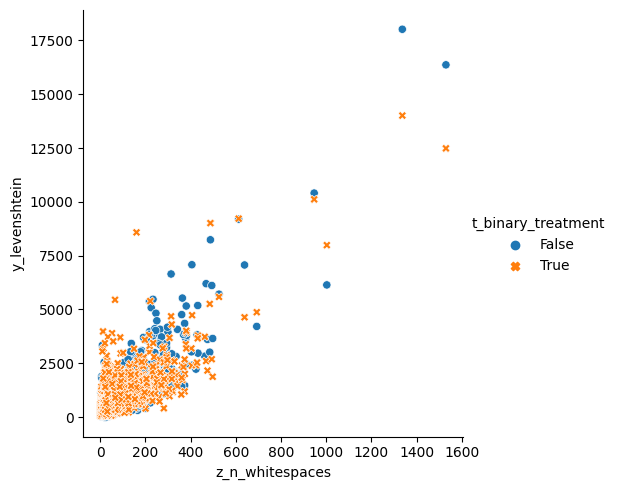

In [87]:
sns.relplot(
    data=df_prune,
    x="z_n_whitespaces", y="y_levenshtein", hue="t_binary_treatment", style="t_binary_treatment"
)

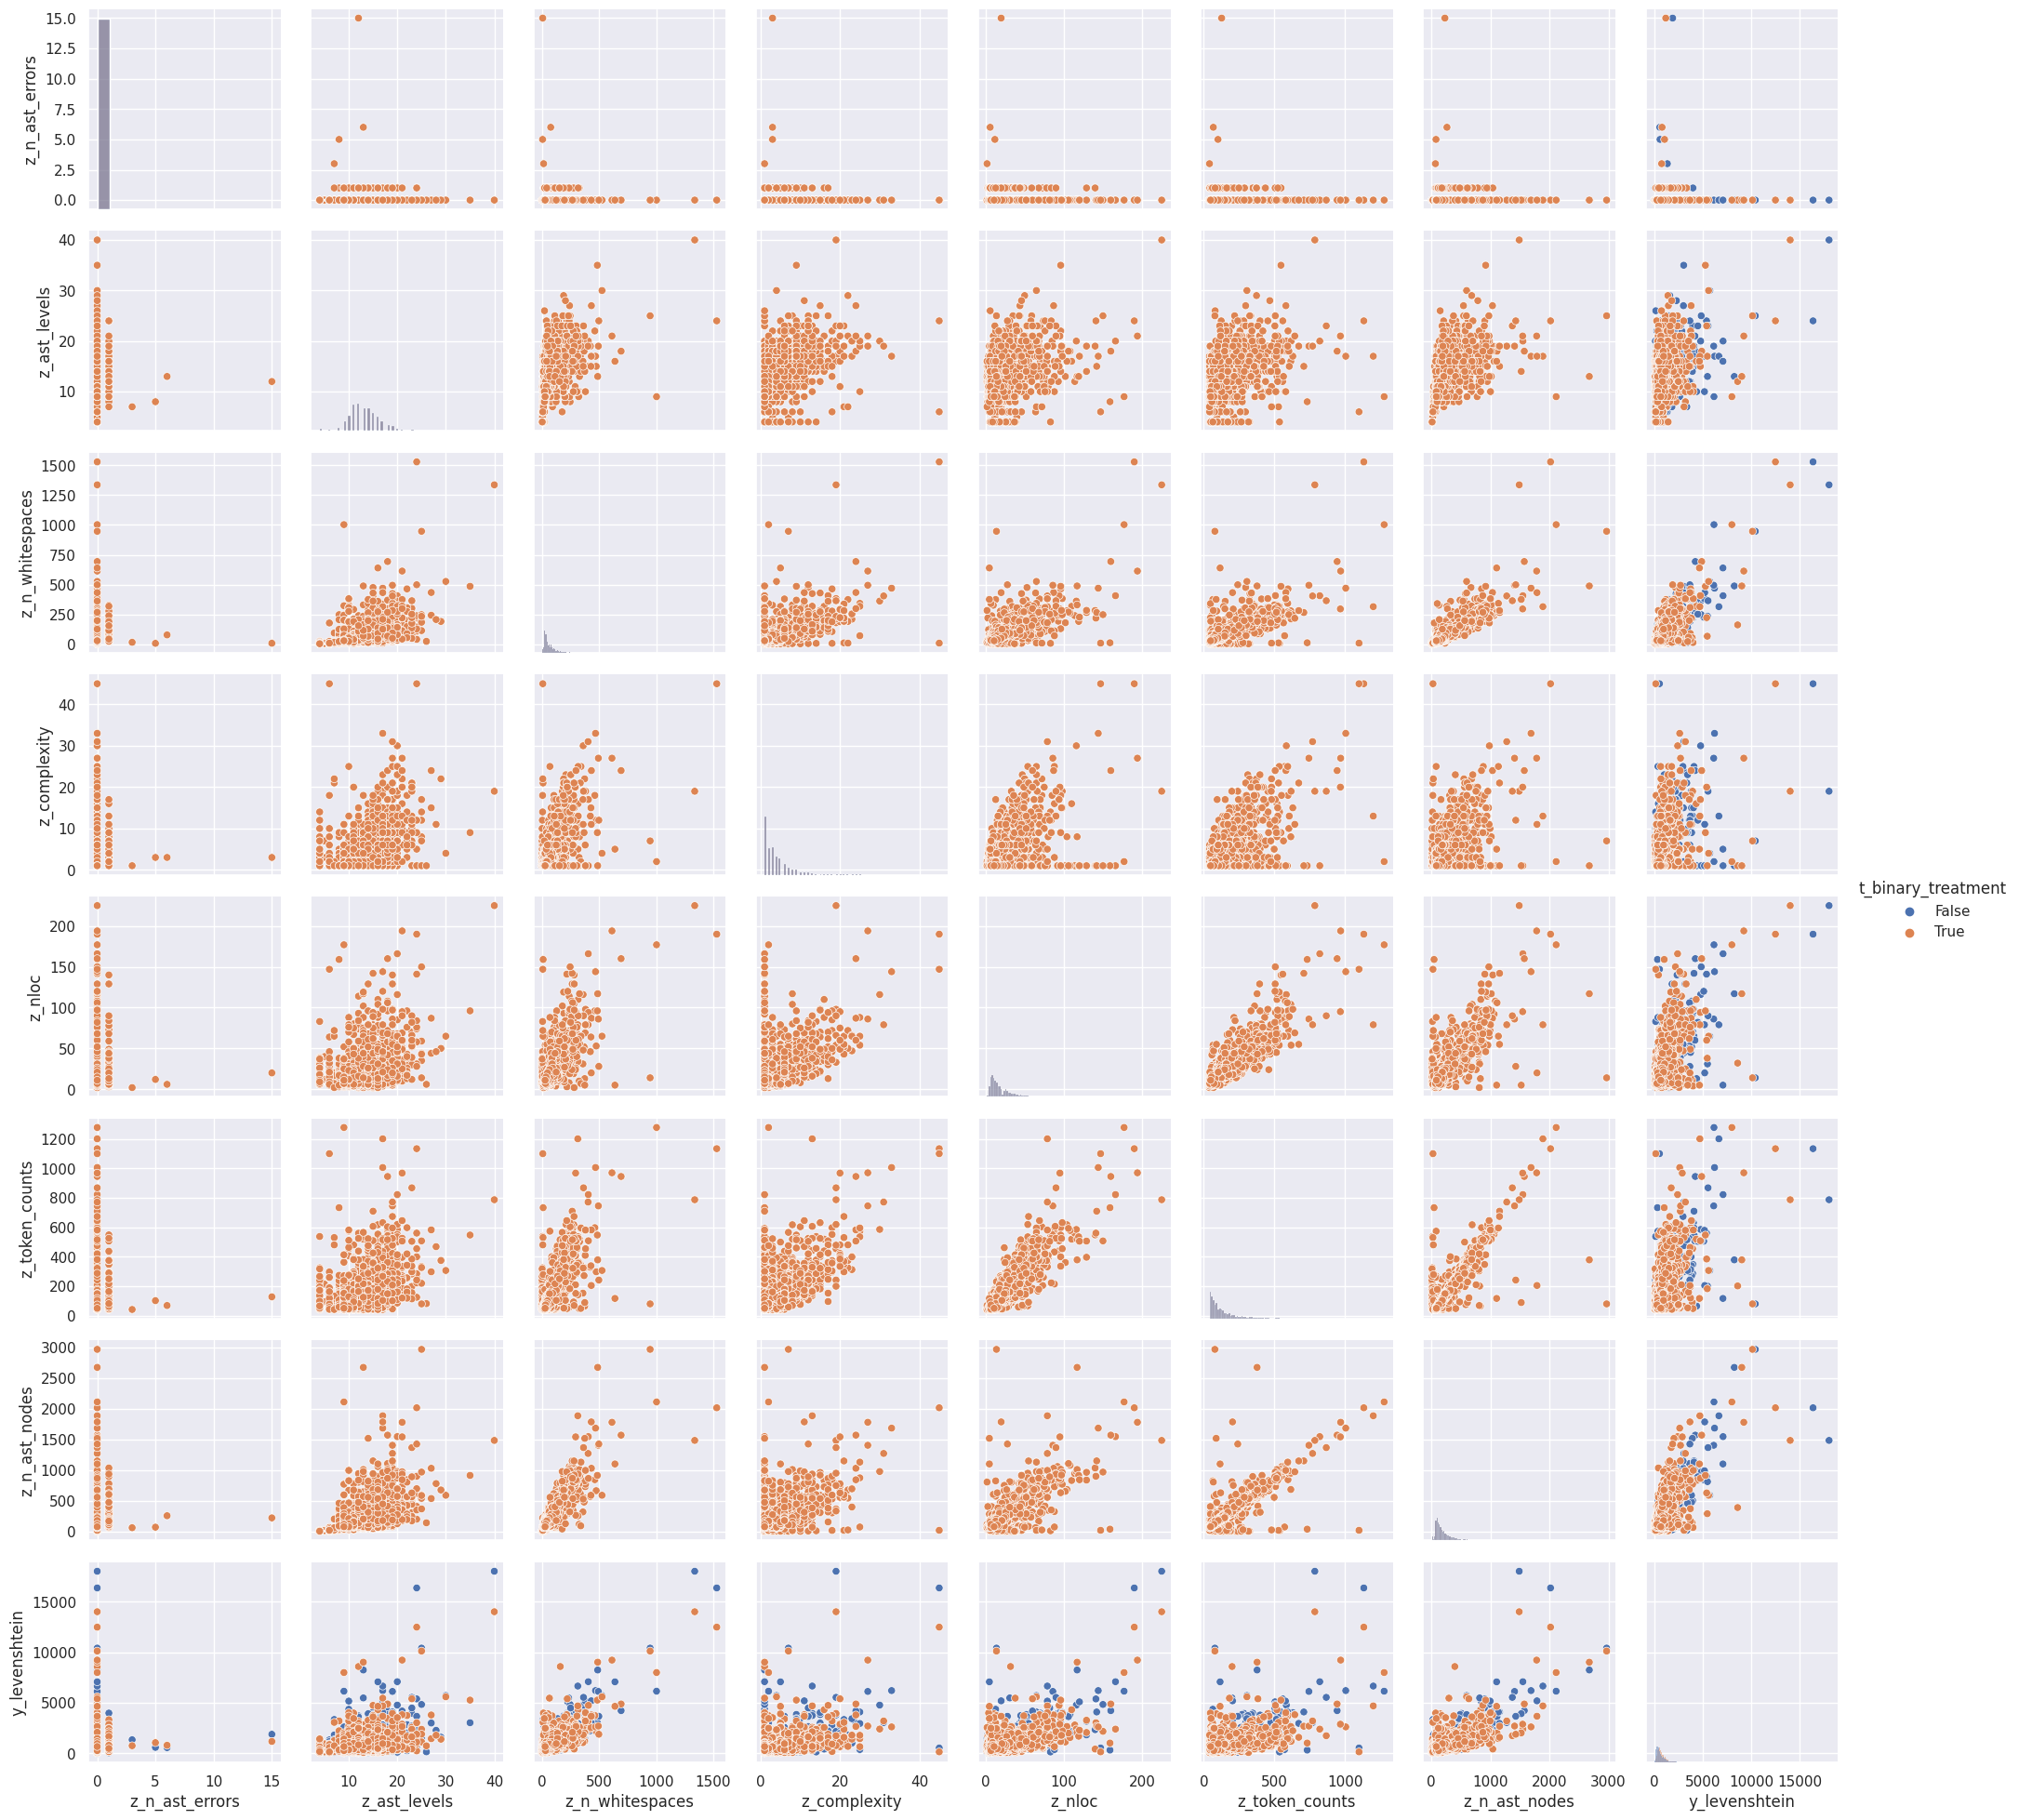

In [89]:
g = sns.PairGrid(df_prune, hue="t_binary_treatment")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
